<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day5/Spiral/Spiral_Teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Competition: Spirals
![spiral image](https://raw.githubusercontent.com/nikopj/SummerML/master/Day5/Spiral/spiral.png)

Use you machine learning knowledge gained so far to build a model that can classify whether a point belongs to the red spiral or the blue spiral.
The training dataset is located on the [course github](https://github.com/nikopj/SummerML). A test set of input features is also located on the course github. Once your model is trained (and you are confident with it), make predictions on the test data. The ground truth test set class labels will be given at the end of class to determine the winner of the competition.

## Code to present:
You will be presenting your solutions to the class at the end of the day. Write your code clearly and annotate your notebook 

# Load the Training Data


In [188]:
## TODO
import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing
url = "https://raw.githubusercontent.com/nikopj/SummerML/master/Day5/Spiral/spiral_train.csv"
df  = pd.read_csv(url)

x1 = preprocessing.scale(df['x1'].values.reshape(-1,1)) # coordinate features
x2 = preprocessing.scale(df['x2'].values.reshape(-1,1))
y  = df['class'].values; # class labels

nsamp  = y.shape[0]
ntrain = np.int(0.8*nsamp)
nval   = nsamp - ntrain

Xtr = np.hstack((x1[:ntrain],x2[:ntrain])) # feature vector
ytr = y[:ntrain]                           # class vector

Xval = np.hstack((x1[ntrain:],x2[ntrain:])) # feature vector
yval = y[ntrain:]                           # class vector

print("# Samples: %d \n# Train: %d\n# Validation: %d" % (nsamp,ntrain,nval))

# Samples: 1000 
# Train: 800
# Validation: 200


# Visualize the Data
Confirm that you have loaded the data correctly.

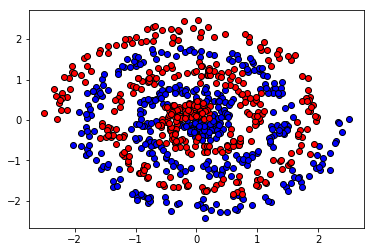

In [189]:
## TODO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Xtr[ytr==0,0], Xtr[ytr==0,1],'ob',markeredgecolor='black');
plt.plot(Xtr[ytr==1,0], Xtr[ytr==1,1],'or',markeredgecolor='black');

# Come up with a Model
 Basis functions? Model complexity? Error Function? Linear or Logistic Regression?

In [0]:
## TODO: this is where the competition really begins...

# import scipy statistics for easy mvn evaluation
from scipy.stats import multivariate_normal

# Model: high complexity localization via space-constrained basis functions
# Basis functions chosen: lxl grid of 2D Gaussians
# Error function: binary cross entropy
# Logistic regression

l = 10 # model complexity parameter
# x-spatial extent
i = np.linspace(-3,3,l);
# y-spatial extent
j = np.linspace(-3,3,l);

phi = [] # list of basis functions
for m in np.arange(l):
  for n in np.arange(l):
    phi.append(multivariate_normal([i[m],j[n]], [[.01, 0], [0, .01]]))
    
# form the design matrix, A
def design(X,phi):
  N = X.shape[0]
  A = np.ones((N,1)) # append bias term to beginning
  for p in np.arange(l*l):
    A = np.concatenate((A,phi[p].pdf(X).reshape(-1,1)), axis=1)
  return A

# Visualize Your Basis Functions
Verify your design.

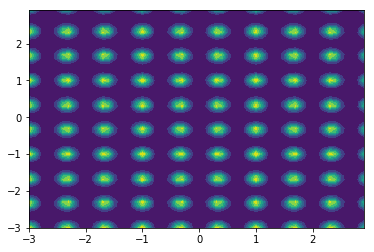

In [205]:
## TODO:

# create meshgrid of coordinates to plot 2D
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
pos = np.dstack((xx, yy))

# superimpose basis functions for easy plotting
zz = np.zeros_like(xx)
for i in np.arange(len(phi)):
  zz += phi[i].pdf(pos) # evaluate each basis function at the meshgrid points

# 2D contour plot (in color)
plt.contourf(xx,yy,zz);

# Train your Model


In [0]:
## TODO:
A = design(Xtr,phi)
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(A,ytr);

# Goodness of Fit
Are you overfitting? Are you sure? If so, how? Can you make your fit better?

In [206]:
## TODO: Compute your metrics for goodness of fit

A = design(Xtr,phi)
yhat = logreg.predict(A)
acc = np.sum(abs(ytr-yhat)) / ntrain
print(acc)

A = design(Xval,phi)
yhat = logreg.predict(A)
acc = np.sum(abs(yval-yhat)) / nval
print(acc)

0.4125
0.435


# Load the Test Data

In [0]:
## TODO:
url = "https://raw.githubusercontent.com/nikopj/SummerML/master/Day5/Spiral/spiral_test_feature.csv"
df  = pd.read_csv(url)

x1 = preprocessing.scale(df['x1'].values.reshape(-1,1)) # coordinate features
x2 = preprocessing.scale(df['x2'].values.reshape(-1,1))

Xts = np.hstack((x1,x2)) # feature vector
ntest = Xts.shape[0]

# Make Predictions on the Test Data

In [0]:
## TODO: this is your submission to the competition

A = design(Xts,phi)
yhat = logreg.predict(A)

# STOP! -- > PRESENTATIONS
**All work on training your models must cease. You must prepare a presentation as a group.**
You will walk the class through your notebook to explain your work for the competition. Unfinished work must still be presented. Your group will have **10 minutes to present**.

## Requirements:
- Your notebook needs to be well documented and clearly commented. 
- All plots need labels and titles. 
- Be able to explain all of your design choices. (audience, ask questions!)
- Explain why you belive your model will acheive the highest test accuracy.
- Give thoughts on alternate strategies and room for improvement.
- Answer questions.

## Code for illustrating aspects of your implemented design may be put below.

In [0]:
## TODO: (optional)

# Test Time!
*After presentations*, the class labels will be uploaded to the course website. Import them and evaluate your test accuracy.


## Load the test labels

In [0]:
## TODO:
url = "https://raw.githubusercontent.com/nikopj/SummerML/master/Day5/Spiral/spiral_test_class.csv"
df  = pd.read_csv(url)

yts = df['class'].values

## Evaluate your accuracy
Report your results to the teachers.

In [207]:
## TODO:
acc = np.sum(abs(yts-yhat)) / ntest
print(acc)

0.54
